In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from flexitext import flexitext
from functools import reduce
from scipy.special import expit

In [2]:
plasma_colormap = matplotlib.cm.get_cmap("plasma")
COLORS = [plasma_colormap(x) for x in np.linspace(0.8, 0.15, num=4)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]

In [3]:
class Probabilities:
    def __init__(self, grid, auth, responses, programs):
        self.grid = grid
        self.auth = auth
        self.responses = responses
        self.programs = programs

    def compute(self, j):
        eta = self.grid * self._auth_coef() + self._program_coef(j)
        n_responses = len(self.responses["mean"]) + 1
        probs = [0] * n_responses
        for i in range(n_responses):
            if i == 0:
                response = self._response_coef(i)
                probs[i] = expit(response - eta)
            elif i < n_responses - 1:
                response = self._response_coef(i)
                response_previous = self._response_coef(i - 1)
                probs[i] = expit(response - eta) - expit(response_previous - eta)
            else:
                probs[i] = 1 - reduce(lambda a, b: a + b, probs[:-1])
        
        return probs
        
    def _auth_coef(self):
        mean = self.auth["mean"]
        sd = self.auth["sd"]
        return np.random.normal(mean, sd)
    
    def _response_coef(self, idx):
        mean = self.responses["mean"][idx]
        sd = self.responses["sd"][idx]
        return np.random.normal(mean, sd)
    
    def _program_coef(self, idx):
        mean = self.programs["mean"][idx]
        sd = self.programs["sd"][idx]
        return np.random.normal(mean, sd)

In [4]:
x = np.linspace(-3, 3, 500)

auth = {
    "mean": 0.21,
    "sd": 0.06
}

responses = {
    "mean": [-0.71, 0.5, 1.28],
    "sd": [0.05] * 3
}

programs = {
    "mean": [0, 0.23, 0.39, 0.69, 0.97],
    "sd": [0] + [0.09] * 4
}

In [5]:
probabilities = Probabilities(x, auth, responses, programs)

## Basic linechart with multiple groups

In [6]:
matplotlib.rcParams["font.family"] = "IBM Plex Sans"

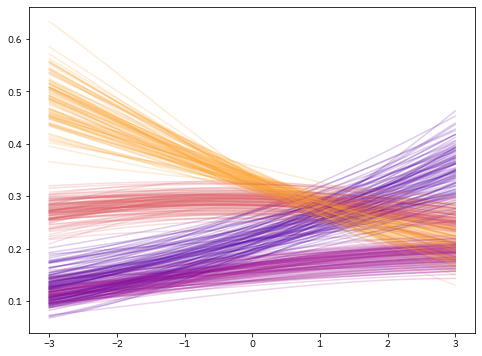

In [7]:
fig, ax = plt.subplots(figsize = (8, 6))

for _ in range(100):
    y = probabilities.compute(0)
    for i in range(len(y)):
        ax.plot(x, y[i], color=COLORS[i], alpha=0.2, lw=1.5)

## Customize layout

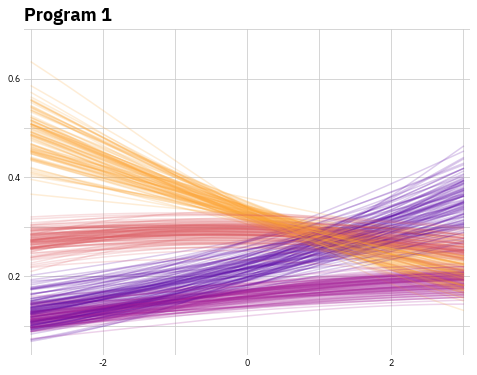

In [8]:
ax.tick_params(axis="both", which="both", length=0)

ax.set_xticks([-2, 0, 2], minor=False)
ax.set_xticklabels([-2, 0, 2], minor=False, size=9)
ax.set_xticks([-3, -1, 1, 3], minor=True)
ax.set_xlim(-3.1, 3.1)
ax.xaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=1)

ax.set_yticks([0.2, 0.4, 0.6], minor=False)
ax.set_yticklabels([0.2, 0.4, 0.6], minor=False, size=9)
ax.set_yticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.yaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=1)

for spine in ["top", "right", "bottom", "left"]:
    ax.spines[spine].set_visible(False)

    
ax.text(0, 1.025, "Program 1", weight="bold", size=18, transform=ax.transAxes)    

fig

## Multiple panels plot

In [9]:
def adjust_axis_layout(ax, title):
    ax.tick_params(axis="both", which="both", length=0)

    ax.set_xticks([-2, 0, 2], minor=False)
    ax.set_xticklabels([-2, 0, 2], minor=False, size=11, color="0.3")
    ax.set_xticks([-3, -1, 1, 3], minor=True)
    ax.set_xlim(-3.1, 3.1)
    ax.xaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=0.5)

    ax.set_yticks([0.2, 0.4, 0.6], minor=False)
    ax.set_yticklabels([0.2, 0.4, 0.6], minor=False, size=11, color="0.3")
    ax.set_yticks([0.1, 0.3, 0.5, 0.7], minor=True)
    ax.yaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=0.5)

    for spine in ["top", "right", "bottom", "left"]:
        ax.spines[spine].set_visible(False)

    ax.set_title(title, weight=500, size=14, loc="left") 
    
    return ax

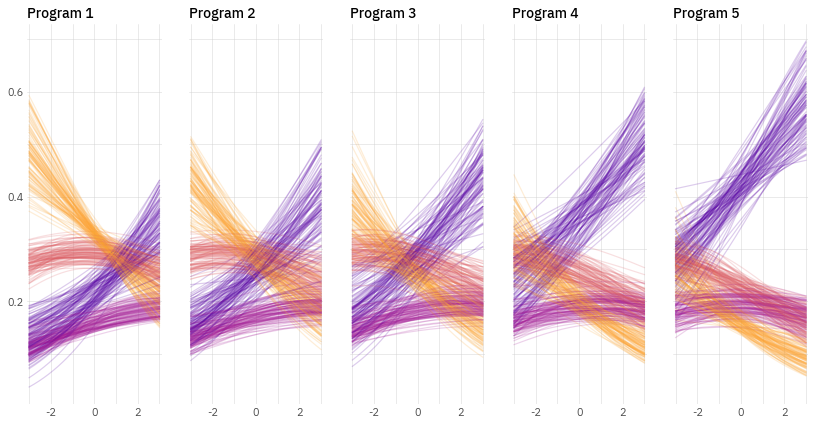

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(14, 7), sharey=True)

for j in range(5):
    ax = axes[j]
    for _ in range(100):
        y = probabilities.compute(j)
        for i in range(len(y)):
            ax.plot(x, y[i], color=COLORS[i], alpha=0.2, lw=1.2)
    
    adjust_axis_layout(ax, f"Program {j + 1}")

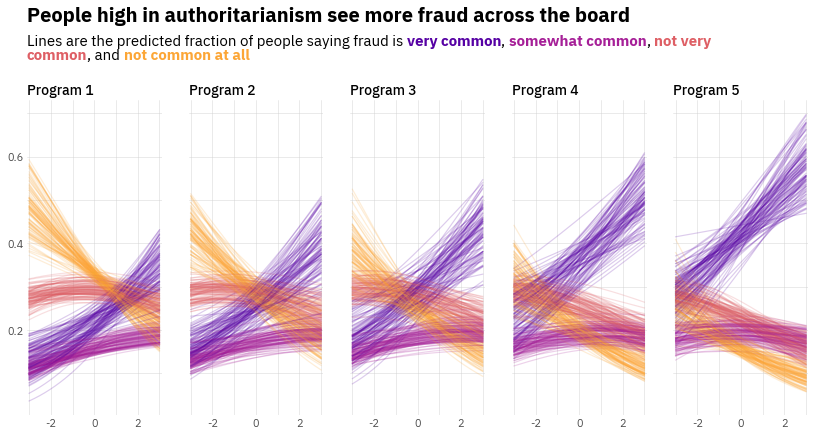

In [11]:
fig.subplots_adjust(top = 0.75)

title = (
    "<size:20, weight:bold>People high in authoritarianism see more fraud across the board</>\n\n"
    "<size:15>Lines are the predicted fraction of people saying fraud is "
    f"<color:{COLORS[3]}, weight:bold>very common</>, <color:{COLORS[2]}, weight:bold>somewhat common</>, "
    f"<color:{COLORS[1]}, weight:bold>not very\ncommon</>, and <color:{COLORS[0]}, weight:bold>not common at all</></>"
)

flexitext(0.125, 0.825, title, va="bottom", xycoords="figure fraction", ax=axes[0])
fig

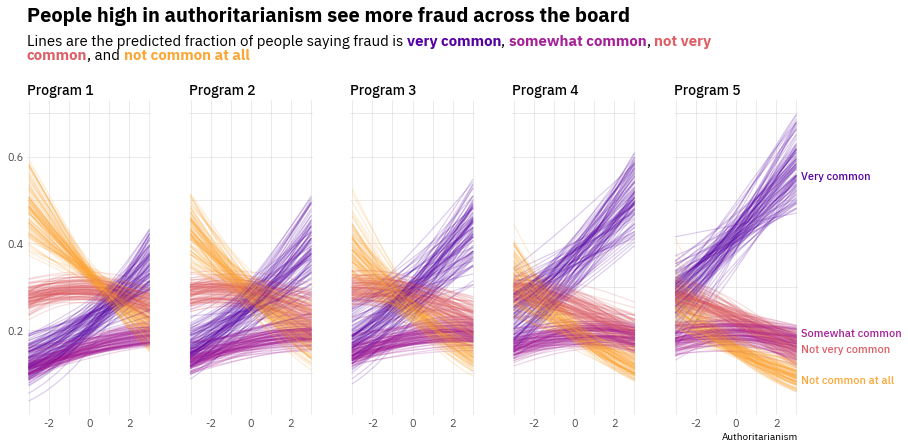

In [12]:
fig.subplots_adjust(right = 0.89, wspace=0.3)

ax = axes[-1]

ax.text(
    1.02, 0.75, "Very common", size=11, weight="medium", 
    color=COLORS[3], transform=ax.transAxes
)
ax.text(
    1.02, 0.25, "Somewhat common", size=11, weight="medium", 
    color=COLORS[2], transform=ax.transAxes
)
ax.text(
    1.02, 0.2, "Not very common", size=11, weight="medium",
    color=COLORS[1], transform=ax.transAxes
)
ax.text(
    1.02, 0.1, "Not common at all", size=11, weight="medium",
    color=COLORS[0], transform=ax.transAxes
)

ax.text(1, -0.075, "Authoritarianism", ha="right", size=10, transform=ax.transAxes)

fig

In [13]:
fig.set_facecolor("white")
fig.savefig("plot.png", dpi=300)